# Policy Briefing Title that Matches PDF Title

## CASA0013: Foundations of Spatial Data Science

### Student Ids: ucftXXXX, ucftYYYY, etc.

### 

### Structure

### Import libraries

### 1. Loading and reading data

### 2. Pre-processing

### 3. Processing

### 4. Analysing, Presenting

### Import Libraries

Before everything, import libraries that will be used to run the following code

In [1]:
import os
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from requests import get
import geopandas as gpd
import seaborn as sns

### 1. Loading data

#### 1.1 Download remote data

We select four years of Inside Airbnb data from 2019 to 2022 for analysing the impacts of Covid-19.

All these data are from gzip compressed files, so extraction is needed.

In [2]:
# set a function for caching data
def cache_data(src: str, dest: str) -> str:
    """
    Downloads and caches a remote file locally.
    
    This will save it locally with the remote files and can check if it already exists, 
    so you don't need to download by yourself and won't do it twice.
    
    Parameters
    ----------
    src : str
        The remote *source* for the file, any valid URL should work.
        
    dest : str
        The *destination* location to save the downloaded file.
        
    Returns
    -------
    str
        A string representing the local location of the file.
    """
    
    url = urlparse(src)  # to combine the components back into a valid URL string
    fn = os.path.split(url.path)[-1]  # Extract the filename
    dfn = os.path.join(dest, fn)  # Destination filename

    if not os.path.isfile(dfn):

        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)

        if len(path) >= 1 and path[0] != "":
            os.makedirs(os.path.join(*path), exist_ok=True)

        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)

        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

The function above allows us to combine components for a vaid URL.

For example, if datasets are all from a same website, so the source path will be the same, the only difference is the follwing downloading parts, see code below.

In [3]:
# set the destination directory for data to download in
ddir = os.path.join("data", "insideairbnb")
# source path
spath = "https://orca.casa.ucl.ac.uk/~jreades/data/"

# download Airbnb data in 2019, 2020, 2021, and 2022, (ab is short as airbnb)
ab19 = pd.read_csv(
    cache_data(spath + "London-2019-11-listings.csv.gz", ddir),
    compression="gzip",
    low_memory=False,
)

ab20 = pd.read_csv(
    cache_data(spath + "London-2020-11-listings.csv.gz", ddir),
    compression="gzip",
    low_memory=False,
)

ab21 = pd.read_csv(
    cache_data(spath + "London-2021-10-listings.csv.gz", ddir),
    compression="gzip",
    low_memory=False,
)
# or use the link to download directly

ab22 = pd.read_csv(
    cache_data(
        "http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/data/listings.csv.gz",
        ddir,
    ),
    compression="gzip",
    low_memory=False,
)

print("Done.")

Found data/insideairbnb/London-2019-11-listings.csv.gz locally!
Found data/insideairbnb/London-2020-11-listings.csv.gz locally!
Found data/insideairbnb/London-2021-10-listings.csv.gz locally!
Found data/insideairbnb/listings.csv.gz locally!
Done.


#### 1.2 Read data

Have a basic overview of data

Here, we set randomly five rows for a quick overview, and check if there are any duplicated rows.

In [4]:
# define a function for basic overview

def overview(df):
    """
    Basic overview of the dataframe.
    
    This can remove the duplicated rows before having an overview. 
    And choosing 5 rows randomly to have a quick view.
    
    Parameters
    ----------
    df: dataframe
    
    """
    print()
    # check if there are duplicate rows and drop them
    if df.duplicated().sum() > 0:
        print(f"There are {df.duplicated().sum()} duplicated rows")
        df.drop_duplicates(inplace=True, ignore_index=True)
        print("These duplicated columns are dropped.")
    else:
        print("There is no duplicated rows.")
    print(f"Data frame is {df.shape[0]:,} rows x {df.shape[1]} columns")
    print("\n")
    
    # check columns and data type
    print("Basic Overview")
    df.info()

    print("\n")
    print("Random rows for a quick view")
    display(df.sample(5))

Overview the data

In [5]:
overview(ab19)


There are 155 duplicated rows
These duplicated columns are dropped.
Data frame is 85,081 rows x 18 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85081 entries, 0 to 85080
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              85081 non-null  object
 1   name                            85081 non-null  object
 2   host_id                         85081 non-null  object
 3   host_name                       85081 non-null  object
 4   neighbourhood_group             85081 non-null  object
 5   neighbourhood                   85081 non-null  object
 6   latitude                        85081 non-null  object
 7   longitude                       85081 non-null  object
 8   room_type                       85081 non-null  object
 9   price                           85081 non-null  object
 10  minimum_nights                  85081 non

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_class,last_review_timestamp
34903,1647720,"Brick Lane, Spitalfields my Luxury Flat",8742226,Jeremy,,Tower Hamlets,51.52362,-.07007,Private room,103,2,115,2019-08-17,1.54,2,320,Private room,8/17/2019 0:00:00
6330,21722880,"Double Room ensuite, private house London SE5",158177609,Natalia,,Southwark,51.46146,-.09092,Private room,50,1,18,2019-10-29,.8,1,83,Private room,10/29/2019 0:00:00
41772,8177328,Spacious flat with huge garden,8932228,Zannah,,Lambeth,51.46926,-.13318,Entire home/apt,125,4,11,2019-06-24,.22,1,14,Entire home/apt,6/24/2019 0:00:00
24126,15113483,Bright Flat in Highbury near Clissold Park,500365,Eva,,Islington,51.56015,-.09773,Entire home/apt,115,2,7,2019-10-02,.56,1,80,Entire home/apt,10/2/2019 0:00:00
64711,3297141,House with garden in Brixton,14544218,Helen,,Lambeth,51.45742,-.12229,Entire home/apt,120,20,5,2015-02-23,.08,1,0,Entire home/apt,2/23/2015 0:00:00


In [6]:
overview(ab20)


There is no duplicated rows.
Data frame is 76,984 rows x 74 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76984 entries, 0 to 76983
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            76984 non-null  int64  
 1   listing_url                                   76984 non-null  object 
 2   scrape_id                                     76984 non-null  int64  
 3   last_scraped                                  76984 non-null  object 
 4   name                                          76961 non-null  object 
 5   description                                   73931 non-null  object 
 6   neighborhood_overview                         47836 non-null  object 
 7   picture_url                                   76984 non-null  object 
 8   host_id                                       7698

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
30435,21265827,https://www.airbnb.com/rooms/21265827,20201106040109,2020-11-06,Triple Room with shared bathroom,This property is located walking distance from...,NaN,https://a0.muscache.com/pictures/2e03fc54-9a4a...,152029649,https://www.airbnb.com/users/show/152029649,...,10.0,10.0,8.0,NaN,f,5,0,5,0,0.07
30525,21315952,https://www.airbnb.com/rooms/21315952,20201106040109,2020-11-07,single bedroom near heathrow london free parking,my home is on the edge of a small estate its o...,NaN,https://a0.muscache.com/pictures/1b724dc8-7796...,154284698,https://www.airbnb.com/users/show/154284698,...,10.0,10.0,10.0,NaN,f,1,0,1,0,1.87
38274,25652731,https://www.airbnb.com/rooms/25652731,20201106040109,2020-11-06,Beautiful house W12,Beautiful house situated in very quiet familia...,NaN,https://a0.muscache.com/pictures/00fabab0-13d2...,32525694,https://www.airbnb.com/users/show/32525694,...,10.0,10.0,10.0,NaN,t,4,0,4,0,0.07
49149,32734857,https://www.airbnb.com/rooms/32734857,20201106040109,2020-11-06,Cosy comfort heart of London safe easy access,we live in a nice terraced house. And we are a...,This is a great neighbourhood. with lots of sh...,https://a0.muscache.com/pictures/cc6020be-df6c...,246157535,https://www.airbnb.com/users/show/246157535,...,10.0,10.0,9.0,NaN,f,1,0,1,0,0.10
23957,18084811,https://www.airbnb.com/rooms/18084811,20201106040109,2020-11-06,Rooftop views in Notting Hill Gate,"Loft style, spacious studio flat. Top floor of...","This is one of the most fashionable, fun and p...",https://a0.muscache.com/pictures/e8fac306-d8e7...,96649754,https://www.airbnb.com/users/show/96649754,...,10.0,10.0,9.0,NaN,f,3,3,0,0,0.05


In [7]:
overview(ab21)


There is no duplicated rows.
Data frame is 70,617 rows x 74 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70617 entries, 0 to 70616
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            70617 non-null  int64  
 1   listing_url                                   70617 non-null  object 
 2   scrape_id                                     70617 non-null  int64  
 3   last_scraped                                  70617 non-null  object 
 4   name                                          70593 non-null  object 
 5   description                                   67718 non-null  object 
 6   neighborhood_overview                         42021 non-null  object 
 7   picture_url                                   70617 non-null  object 
 8   host_id                                       7061

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6687,6944512,https://www.airbnb.com/rooms/6944512,20210909211636,2021-09-11,Chic 1br flat in Ladbroke Grove W11,"Modern, open plan flat with 1 bedroom and a be...","There is a myriad of great restaurants, pubs, ...",https://a0.muscache.com/pictures/88036986/807d...,2563095,https://www.airbnb.com/users/show/2563095,...,5.00,5.00,4.50,NaN,f,1,1,0,0,0.07
4188,4501112,https://www.airbnb.com/rooms/4501112,20210909211636,2021-09-11,3 bed Modernised Victorian House,Spacious family home with a large modern kitch...,We feel so lucky to have so much on our doorst...,https://a0.muscache.com/pictures/56584237/1912...,23343766,https://www.airbnb.com/users/show/23343766,...,4.91,4.82,4.73,NaN,f,1,1,0,0,0.14
11604,11016291,https://www.airbnb.com/rooms/11016291,20210909211636,2021-09-11,"167Victoria Rd, Queens Park, London","Queens Park, in NW London 15 mins by tube fro...",NaN,https://a0.muscache.com/pictures/8edb6d4f-9024...,25641225,https://www.airbnb.com/users/show/25641225,...,4.75,4.83,4.71,NaN,f,1,0,1,0,0.62
32170,24873821,https://www.airbnb.com/rooms/24873821,20210909211636,2021-09-11,Greater London,This property is only 10minutes away from Fenc...,NaN,https://a0.muscache.com/pictures/43dffc4b-ecff...,188042952,https://www.airbnb.com/users/show/188042952,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
65483,49937291,https://www.airbnb.com/rooms/49937291,20210909211636,2021-09-11,Wilfred Street by onefinestay,"Included amenities: Wifi, Welcome Pack, Toilet...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,156158778,https://www.airbnb.com/users/show/156158778,...,NaN,NaN,NaN,NaN,t,94,94,0,0,NaN


In [8]:
overview(ab22)


There is no duplicated rows.
Data frame is 69,351 rows x 75 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   6935

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
67691,704193738542467257,https://www.airbnb.com/rooms/704193738542467257,20220910194334,2022-09-11,city scrape,Urban retreat on the London Canals,Get off grid and enjoy some down time while ...,NaN,https://a0.muscache.com/pictures/36e9e1e3-02cf...,24223207,...,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN
28813,27565383,https://www.airbnb.com/rooms/27565383,20220910194334,2022-09-12,previous scrape,Single Bedroom with Wardrobes in Scandi style ...,Hello! <br /><br />We are two sisters working ...,NaN,https://a0.muscache.com/pictures/2e187f8d-8744...,56954722,...,NaN,NaN,NaN,NaN,f,2,0,2,0,0.02
61452,655582624483612945,https://www.airbnb.com/rooms/655582624483612945,20220910194334,2022-09-11,city scrape,Beautiful house near Kensington&Bayswater.safe,Keep it simple at this peaceful and centrally-...,Neighbourhood around is lovely and safe area.I...,https://a0.muscache.com/pictures/1ec84253-0cc3...,96150452,...,5.00,4.00,4.67,NaN,f,12,2,10,0,1.15
62644,664931654346675375,https://www.airbnb.com/rooms/664931654346675375,20220910194334,2022-09-12,previous scrape,Stylish 2BR APT next to Tooting Bec Common,"Well-appointed, open plan apartment in the hea...",We enter Balham through the verdant grasslands...,https://a0.muscache.com/pictures/miso/Hosting-...,466502400,...,4.50,5.00,5.00,NaN,f,1,1,0,0,1.13
51410,52596871,https://www.airbnb.com/rooms/52596871,20220910194334,2022-09-11,city scrape,"Stylish, huge 3-bedroom flat in the heart of A...",Your family and friends will love this 3-bedro...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2829102,...,4.88,4.88,4.83,NaN,f,1,1,0,0,2.17


Data in 2019 collcted by November: 85,081 rows.

Data in 2020 collected by October: 76,984 rows.

Data in 2021 collected by November: 70,617rows.

Data in 2022 collected by November: 69,351rows.



<div class="alert alert-block alert-warning"><b>Possible problem: wrong datatype</b> 
    
There is a problem with the data type: some numeric data is presented as object. These do not match the ones in [Inside Airbnb Data Doctionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596).
We're going to fix this problem in the pre-processing phase.
</div>

### 2. Pre-processing

#### 2.1 Datatype



In [9]:
# To check the distribution of numeric columns and find if there is any outliers or problemetic value

# Creating histograms for all columns with numeric values to check their distributions and again check their datatype.
def numeric_cols_hist(df, width, height):
    """
    To create histograms of all numeric columns in the dataframe.
    
    This can have a look at distributions of the numeric columns and check it the datatype is correct.
    
    Parameters
    ----------
    df: dataframe
    
    width: set width of histograms
    
    height: set height of histograms
    
    """
    print('Here, density of values in each numeric column is shown.')
    cols = df.select_dtypes(include=('number')).columns.to_list()
    df[cols].hist(bins=30, figsize=(width, height))
    plt.show()


In [10]:
# print columns in airbnb 2019
ab19.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'room_class',
 'last_review_timestamp']

In [11]:
numeric_cols = ['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [12]:
# change columns datatype into the right ones

for col in numeric_cols:
    ab19[col] = ab19[col].str.strip()  # str.strip() can remove leading and trailing characters
    ab19[col] = ab19[col].apply(pd.to_numeric)

ab19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85081 entries, 0 to 85080
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85068 non-null  float64
 1   name                            85081 non-null  object 
 2   host_id                         84912 non-null  float64
 3   host_name                       85081 non-null  object 
 4   neighbourhood_group             85081 non-null  object 
 5   neighbourhood                   85081 non-null  object 
 6   latitude                        84911 non-null  float64
 7   longitude                       84911 non-null  float64
 8   room_type                       85081 non-null  object 
 9   price                           84911 non-null  float64
 10  minimum_nights                  84911 non-null  float64
 11  number_of_reviews               84911 non-null  float64
 12  last_review                     

In [13]:
# select integer columns
int_cols = ['id', 'host_id', 'price', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count', 
           'availability_365']

#for col in int_cols:
#    ab19[col] = ab19[col].astype(int)
# as error shows IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer
# we need to clean the NA values first, some values could be 0 after changing the datatype
ab19 = ab19.dropna()

for col in int_cols:
    ab19[col] = ab19[col].astype(int)

Still need fix some datatype, for example, `id` should be integer instead of float.

Here, density of values in each numeric column is shown.


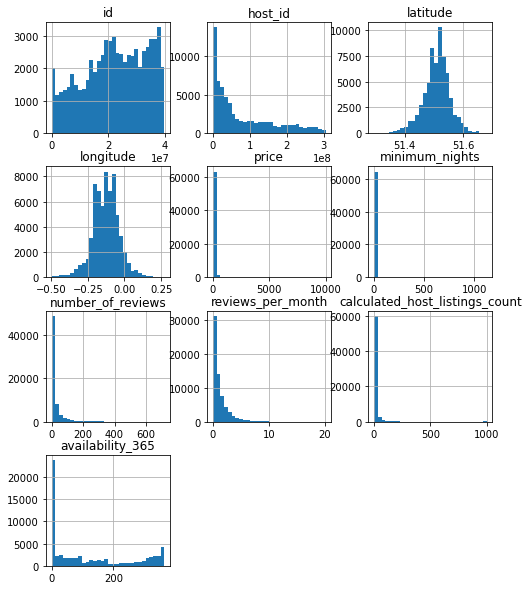

In [14]:
# check the value distributions
numeric_cols_hist(ab19, width=8, height=10)

Seems fine. 

There could be some outliers in column `price`, `minimum_nights`, `number_of_reviews` and the following columns. We will fix this later after choosing the columns we need.

Now the rest three dataframes have wrong datatype showed in `price` column. It should be int.

<div class="alert alert-block alert-warning"><b>Possible problem: ValueError</b> 
    
There is a problem when we wanted to change the datatype of price column, python showed the ValueError: "invalid literal for int() with base 10: '$97.00' " or "Unable to parse string "1,000.00" at position 0".
    
We need two stesp to remove these characters, one for the "$" thing and one for comma. If similar things happen in other column , we can just change the characters and punctuation marks in the function below.
</div>

In [15]:
#ab20['price'] = ab20['price'].astype(int)
#ValueError: invalid literal for int() with base 10: '$97.00'
# and also this error occurs 'Unable to parse string "1,000.00" at position 0'
#so we need to remove the character '$' and the comma ','

def col_to_int(df, col):
    """
    Transform the datatype of price to `int`.
    
    This can remove characters that are leading or tailing the numbers.
    And will remove commas in the string.
    
    Parameters
    ----------
    df: dataframe
    col: 'column name'
    
    """
    df[col] = df[col].str.strip('$') # specific to price column
    df[col] = df[col].str.replace(',', '') #remove comma
    df[col] = df[col].apply(pd.to_numeric) # covert to numeric first
    df[col] = df[col].astype(int)
    df.info() # check
    
col_to_int(ab20, 'price')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76984 entries, 0 to 76983
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            76984 non-null  int64  
 1   listing_url                                   76984 non-null  object 
 2   scrape_id                                     76984 non-null  int64  
 3   last_scraped                                  76984 non-null  object 
 4   name                                          76961 non-null  object 
 5   description                                   73931 non-null  object 
 6   neighborhood_overview                         47836 non-null  object 
 7   picture_url                                   76984 non-null  object 
 8   host_id                                       76984 non-null  int64  
 9   host_url                                      76984 non-null 

In [16]:
col_to_int(ab21, 'price')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70617 entries, 0 to 70616
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            70617 non-null  int64  
 1   listing_url                                   70617 non-null  object 
 2   scrape_id                                     70617 non-null  int64  
 3   last_scraped                                  70617 non-null  object 
 4   name                                          70593 non-null  object 
 5   description                                   67718 non-null  object 
 6   neighborhood_overview                         42021 non-null  object 
 7   picture_url                                   70617 non-null  object 
 8   host_id                                       70617 non-null  int64  
 9   host_url                                      70617 non-null 

In [17]:
col_to_int(ab22, 'price')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   69351 non-null  object 
 9   host_id                                       69351 non-null 

Here, density of values in each numeric column is shown.


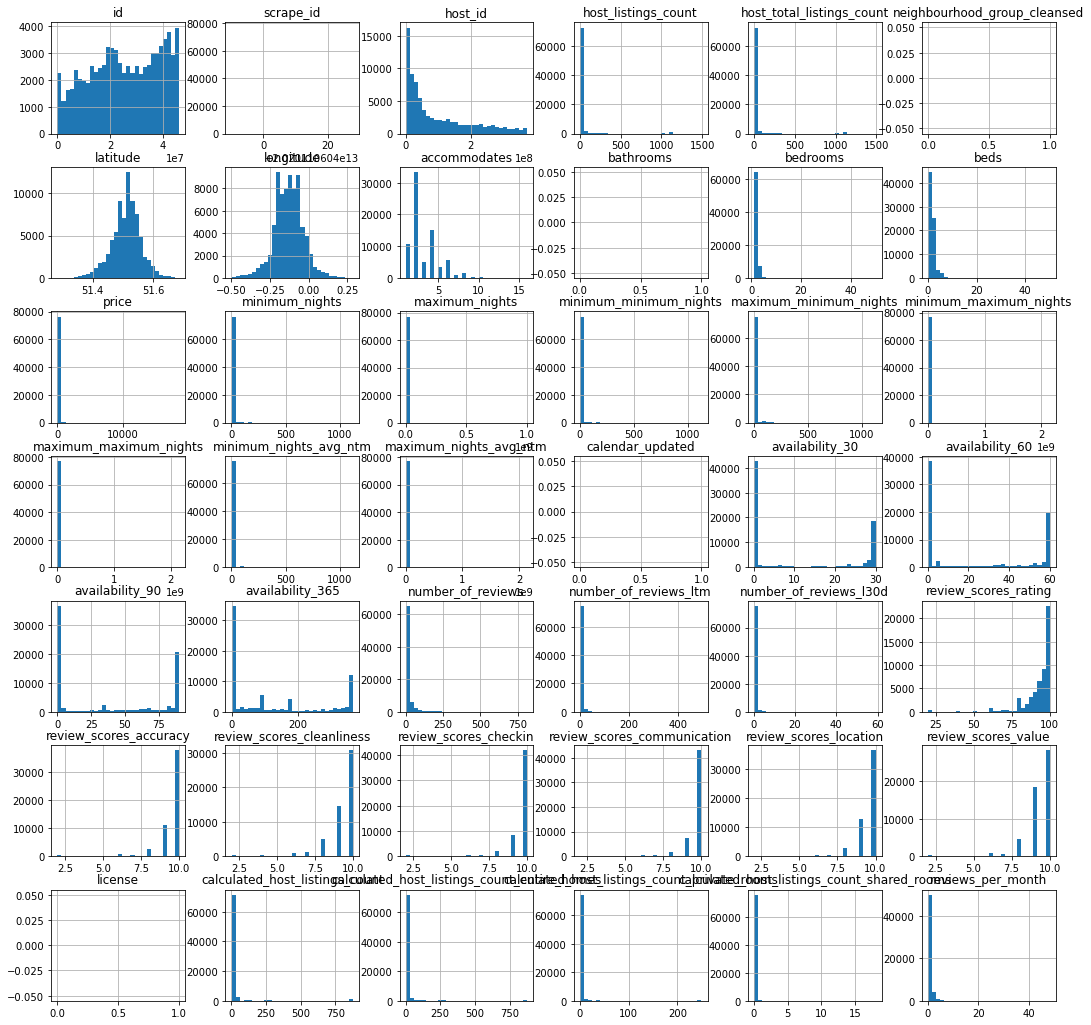

In [18]:
# check the distributions
numeric_cols_hist(ab20, width=18, height=18)

Here, density of values in each numeric column is shown.


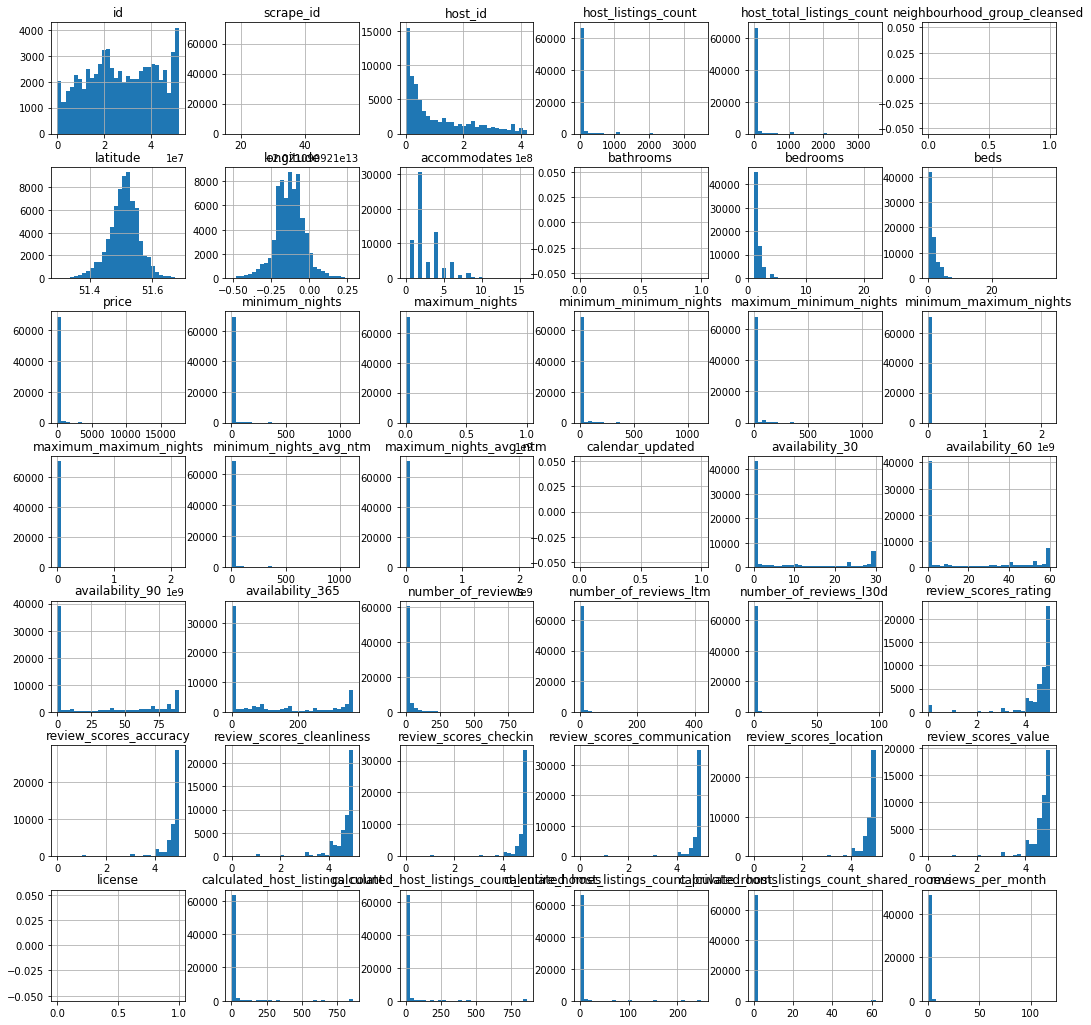

In [19]:
numeric_cols_hist(ab21, width=18, height=18)

Here, density of values in each numeric column is shown.


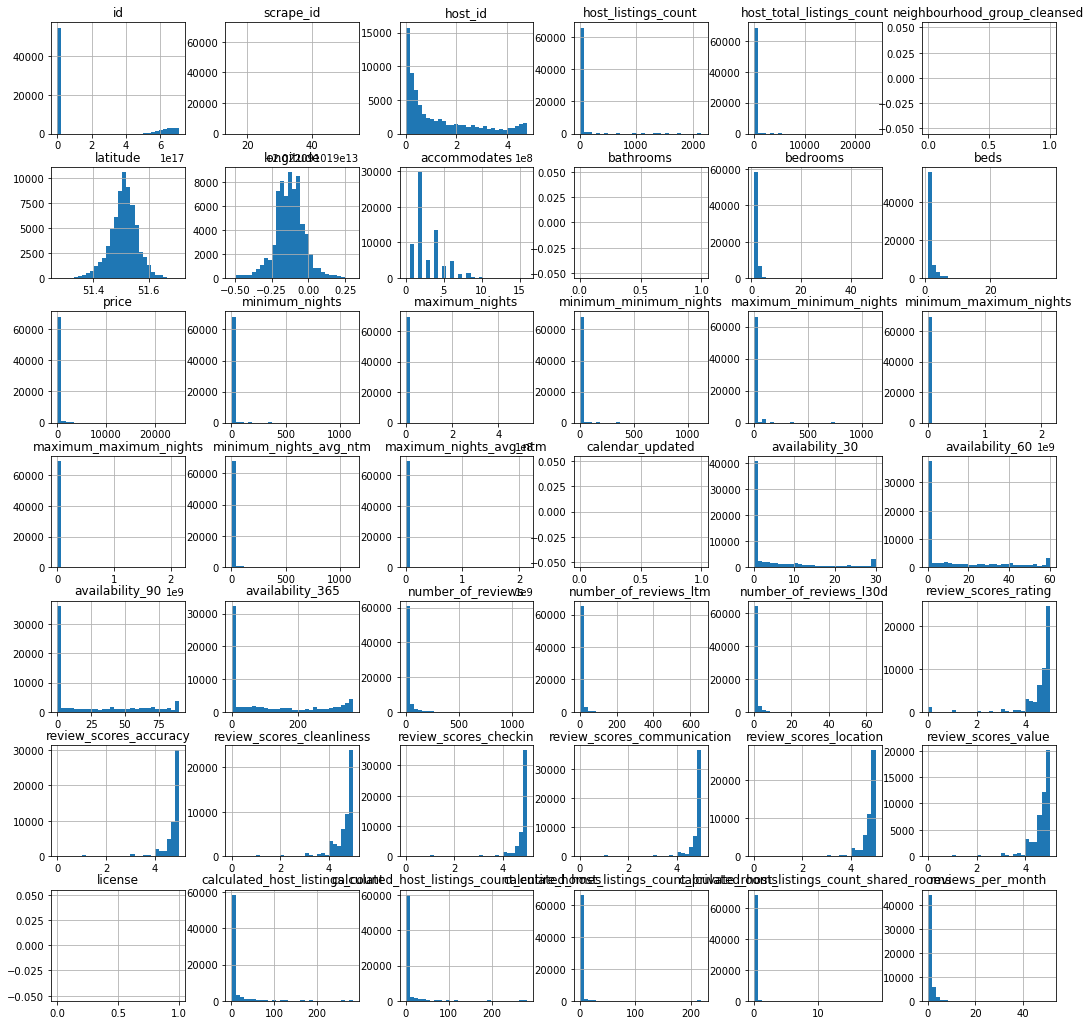

In [20]:
numeric_cols_hist(ab22, width=18, height=18)

#### 2.2 Choosing columns based on our topic

Before continuing our data processing, we're going to select the columns we want first.

We noticed that in `reviews_per_month` from 2019 to 2022 have some empty data values, so we checked the dictionary of this column which refers to "The number of reviews the listing has over the lifetime of the listing". 

Therefore, we can use this as an indicator to define which listings are inactive since they do not have the reviews in the whole year.

In [21]:
ab19.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
room_class                        0
last_review_timestamp             0
dtype: int64

In [22]:
ab20.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               23
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               21733
Length: 74, dtype: int64

In [23]:
ab21.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               24
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               21087
Length: 74, dtype: int64

In [24]:
ab22.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               16780
Length: 75, dtype: int64

##### 2.2.1 Drop na values within the column `name`

In [25]:
ab20 = ab20.dropna(subset=['name'])
ab20.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               21716
Length: 74, dtype: int64

In [26]:
ab21 = ab21.dropna(subset=['name'])
ab21.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               21071
Length: 74, dtype: int64

In [27]:
ab22 = ab22.dropna(subset=['name'])
ab22.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               16766
Length: 75, dtype: int64

##### 2.2.2 Choosing columns

We're going to analyse changes between pre-covid and post-covid. So we select year of 2019 and 2022 to choose columns.

In [38]:
cols_19 = ['id',
 'host_id',
 'neighbourhood',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'availability_365']

In [43]:
cols_22 = ['id',
 'host_id',
 'neighbourhood',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'number_of_reviews_ltm', 
 'last_review',
 'reviews_per_month',
 'availability_365']

In [41]:
# new dataframe of 2019
ab19_new = ab19.loc[:,cols_19]
overview(ab19_new)


There is no duplicated rows.
Data frame is 64,938 rows x 11 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64938 entries, 0 to 64937
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 64938 non-null  int64         
 1   host_id            64938 non-null  int64         
 2   neighbourhood      64938 non-null  object        
 3   latitude           64938 non-null  float64       
 4   longitude          64938 non-null  float64       
 5   price              64938 non-null  int64         
 6   minimum_nights     64938 non-null  int64         
 7   number_of_reviews  64938 non-null  int64         
 8   last_review        64938 non-null  datetime64[ns]
 9   reviews_per_month  64938 non-null  float64       
 10  availability_365   64938 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 5.9+ MB


Random 

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
31909,5211045,26957659,Southwark,51.49666,-0.05227,80,90,21,2019-08-31,0.43,72
52350,26620112,114212764,Tower Hamlets,51.51875,-0.06881,33,3,5,2018-08-19,0.31,0
17532,39316735,186808032,Westminster,51.51836,-0.16892,85,1,2,2019-10-16,2.00,47
32214,24177320,111797043,Hackney,51.56498,-0.06616,80,2,13,2019-08-30,1.89,111
26353,14796115,20396959,Hackney,51.53621,-0.04543,28,2,23,2019-09-26,0.69,12


In [44]:
# new dataframe of 2022
ab22_new = ab22.loc[:,cols_22]
overview(ab22_new)


There is no duplicated rows.
Data frame is 69,330 rows x 12 columns


Basic Overview
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69330 entries, 0 to 69350
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     69330 non-null  int64  
 1   host_id                69330 non-null  int64  
 2   neighbourhood          39961 non-null  object 
 3   latitude               69330 non-null  float64
 4   longitude              69330 non-null  float64
 5   price                  69330 non-null  int64  
 6   minimum_nights         69330 non-null  int64  
 7   number_of_reviews      69330 non-null  int64  
 8   number_of_reviews_ltm  69330 non-null  int64  
 9   last_review            52564 non-null  object 
 10  reviews_per_month      52564 non-null  float64
 11  availability_365       69330 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 6.9+ MB


Random rows f

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,availability_365
32756,32041835,240163662,NaN,51.53660,-0.09844,31,2,1,0,2019-02-11,0.02,0
37078,36794232,10961046,NaN,51.47703,-0.21863,420,5,1,1,2021-10-30,0.09,77
1191,1060899,3569660,NaN,51.52103,-0.13842,110,4,82,5,2022-07-10,0.93,245
6340,7539373,39495086,"London, United Kingdom",51.50068,-0.10126,90,1,5,0,2018-07-29,0.06,0
56871,602917555147962201,447096752,NaN,51.50954,-0.19779,157,1,21,21,2022-08-30,5.58,331


### 3 Processing

In this phase, we'll select columns we need and generate dataframes to be analysed.

#### 3.1 Demand Listings

We will use `number_of_reviews_ltm` (The number of reviews the listing has in the last 12 months) as the indicator which listings are in demand in the short-rental market during that year.

Data of 2019 does not have the column `number_of_reviews_ltm` . And after we checked the date distribution of the last reviews in 2019, we found that the data included reviews left before 2019. So we're going to select reviews activate only in 2019 as the demand listings in 2019.

In [48]:
# change the object datatype into date

In [31]:
date_cols = ['last_review']

array([[<AxesSubplot:title={'center':'last_review'}>]], dtype=object)

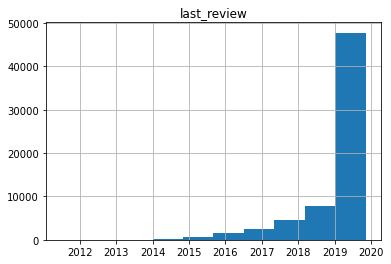

In [46]:
for col in date_cols:
    ab19_new[col] = pd.to_datetime(ab19_new[col])

ab19_new.hist(column = date_cols)

Through the distribution of date, there are some outliers that the dates do not belong with 2019. These listings are not active in 2019, some even not activated since 2014.

As said in the above, we will extract the active ones in 2019.

In [51]:
# 2019 listings was collected on November 2019
# drop last reviews left before 2018-11-01
demand19 = ab19_new[ab19_new['last_review'].ge('2018-11-01')]
demand19.sample(5)

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
43475,10764641,18400954,Camden,51.53133,-0.13422,90,2,14,2019-05-31,0.31,1
3763,10860216,56248983,Richmond upon Thames,51.46872,-0.28228,99,21,71,2019-11-01,1.57,306
45736,17357521,48861995,City of London,51.51265,-0.08939,138,5,23,2019-04-07,0.70,143
48891,600013,2635161,Kensington and Chelsea,51.50002,-0.21086,219,2,3,2018-12-21,0.04,0
6695,38181386,290086568,Camden,51.54469,-0.15212,171,2,5,2019-10-29,2.31,343


In [54]:
# 2022 datatype
for col in date_cols:
    ab22_new[col] = pd.to_datetime(ab22_new[col])

In [55]:
# drop listings do not have reviews in 2022
demand22 = ab22_new[~(ab22_new['number_of_reviews_ltm'] <= 0)]
demand22.head()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,availability_365
0,13913,54730,"Islington, Greater London, United Kingdom",51.56861,-0.11270,50,1,30,9,2022-07-15,0.20,343
2,284532,1481412,"London, United Kingdom",51.52851,-0.07426,90,5,42,1,2022-01-04,0.34,222
4,17402,67564,"London, Fitzrovia, United Kingdom",51.52195,-0.14094,379,4,51,8,2022-09-06,0.36,249
5,107048,259088,"London, United Kingdom",51.52478,-0.10484,180,4,493,20,2022-09-02,3.59,236
6,107051,554519,NaN,51.52055,-0.18317,204,2,581,66,2022-09-02,4.26,193


#### 3.2 Supply listings

As the data is collected from AirBnb. After removing the NA values, the listings are the supply listings.

In [56]:
supply_19 = ab19_new
supply_22 = ab22_new

#### 3.3 Supply changes in 2019, and 2022

### 4. Analysing, Presenting